In [3]:
from PIL import Image
import numpy as np

In [4]:
picture = np.array(Image.open('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif'))[1320:2520, 1760:3360, 1] / 255.0
picture.shape

(1200, 1600)

In [5]:
import cv2 as cv
img = cv.imread('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif', 0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]
inv = ~th3
res = cv.bitwise_and(img,inv)
#cv.imshow(titles[1],res)
#cv.waitKey(0)
cv.imwrite("result.jpg",res)
#cv.destroyAllWindows()

True

In [6]:
import cv2
img = cv2.imread('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif')

Black Dots count is: 101


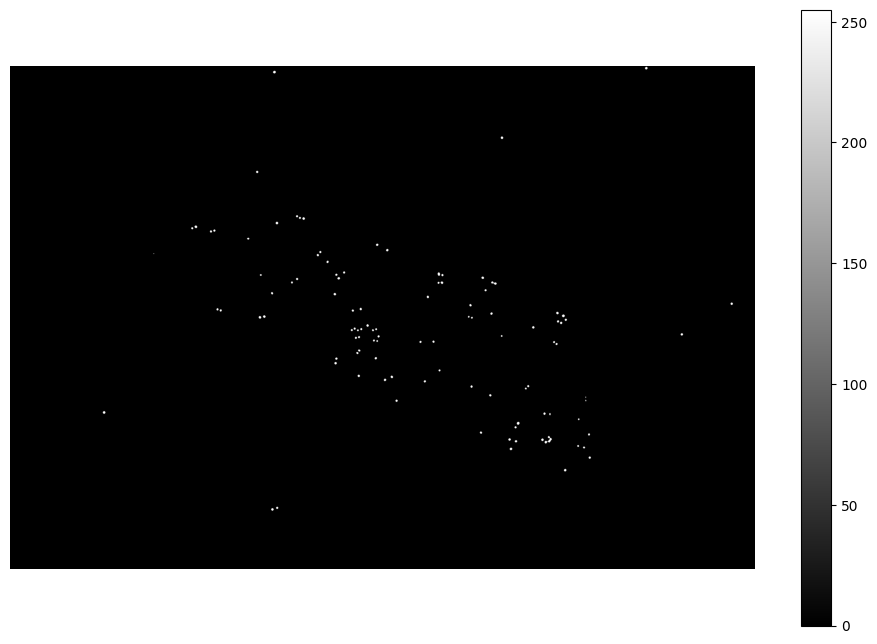

In [50]:
import cv2
import numpy as np

image = cv2.imread('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif')

height = image.shape[0]
cutoff = int(height * 0.9)
image = image[:cutoff, :]

blur = cv2.medianBlur(image, 11)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,7,2)
thresh= cv2.medianBlur(thresh, 15)

thresh = cv2.threshold(thresh, 45, 255, cv2.THRESH_BINARY_INV)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 75
circularity_threshold = 0.7
black_dots = []


for c in cnts:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    if perimeter == 0:
        continue  # Avoid division by zero
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    
    if area > min_area and circularity > circularity_threshold:
        black_dots.append(c)

cv2.drawContours(image, black_dots, -1, (36, 255, 12), 2)  # Draw contours in green
cv2.imwrite('result_adapt_thresh.jpg', image)

print("Black Dots count is:", len(black_dots))
picture = np.array(thresh)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()

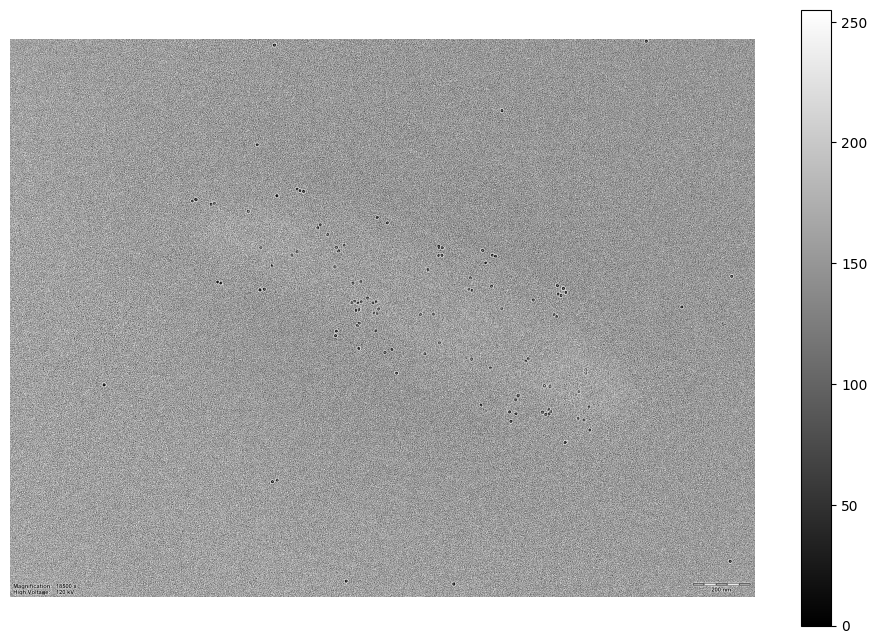

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif', 0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]
inv = ~th3
res = cv.bitwise_and(img,inv)

picture = np.array(th3)

plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()